In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv('ToyotaCorolla.csv')

In [3]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [4]:
df.rename(columns={'Age_08_04':'Age'},inplace=True)

In [5]:
df.shape

(1436, 11)

In [6]:
df.isnull().sum()

Price        0
Age          0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [7]:
df.describe()

,Price,Age,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age        1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


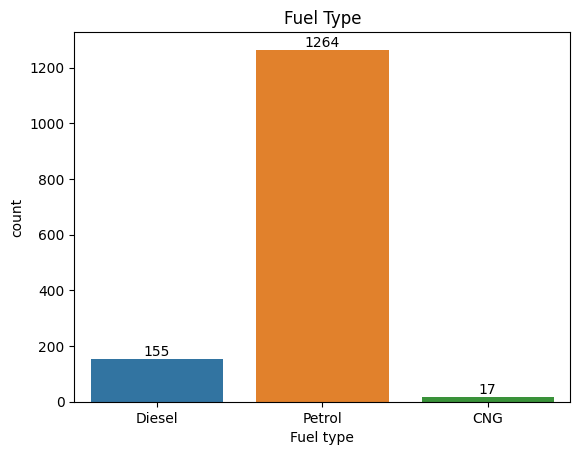

In [9]:
ax=sns.countplot(x=df['Fuel_Type'],hue=df['Fuel_Type'])
for i in ax.containers:
    ax.bar_label(i)
plt.title('Fuel Type')
plt.xlabel('Fuel type')
plt.show()

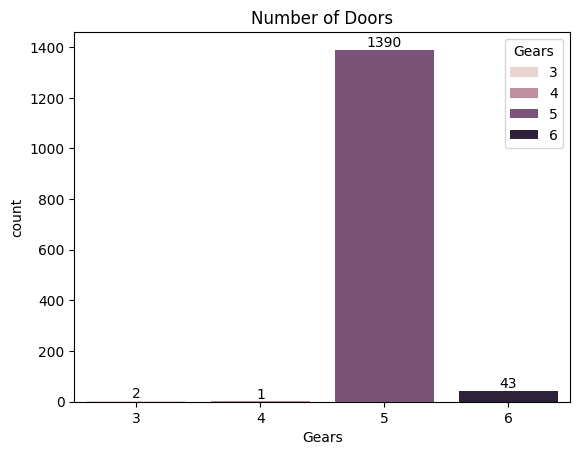

In [10]:
ax=sns.countplot(x=df['Gears'],hue=df['Gears'])
for i in ax.containers:
    ax.bar_label(i)
plt.title('Number of Doors')
plt.show()

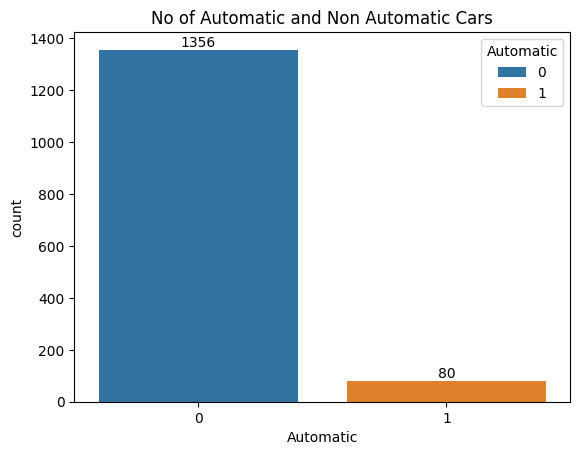

In [11]:
ax=sns.countplot(x=df['Automatic'],hue=df['Automatic'])
for i in ax.containers:
    ax.bar_label(i)
plt.title('No of Automatic and Non Automatic Cars')
plt.show()

In [12]:
selected_columns=['Price', 'Age', 'KM', 'HP', 'Doors', 'Gears', 'Weight']

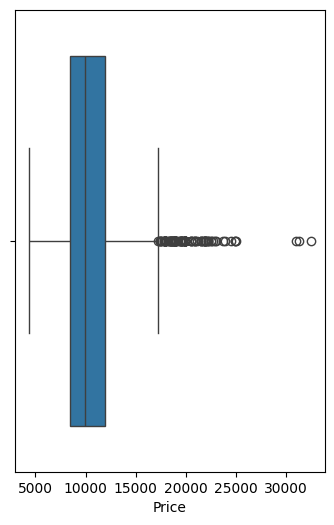

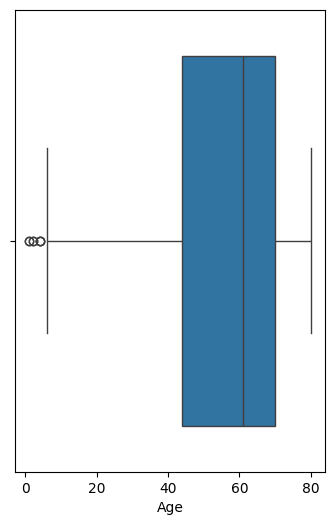

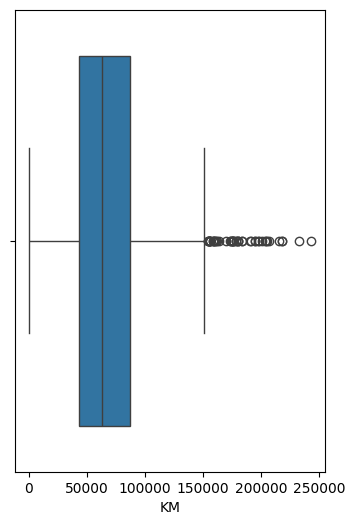

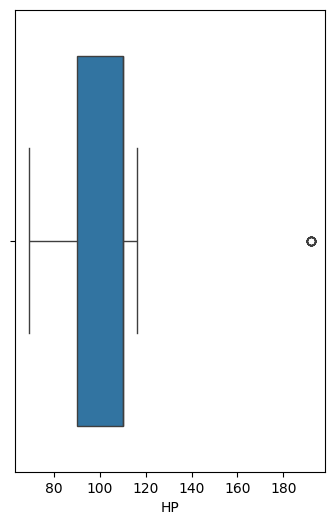

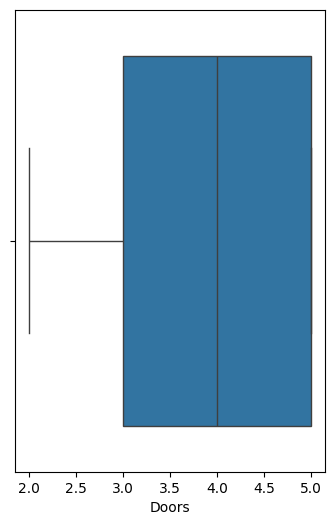

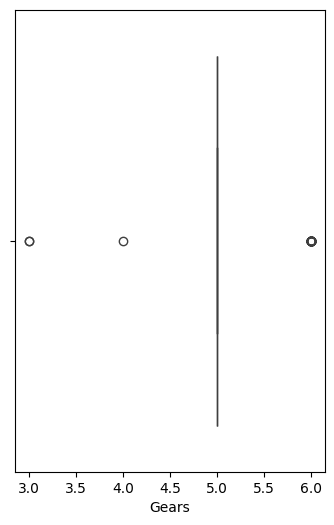

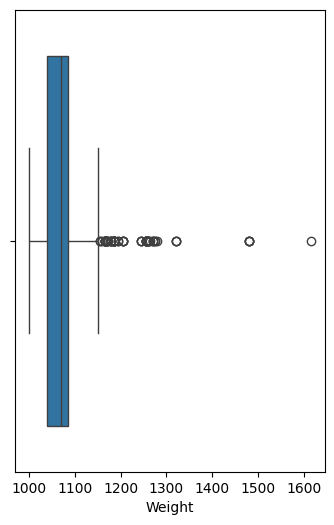

In [13]:
for cols in selected_columns:
    plt.figure(figsize=(4,6))
    sns.boxplot(x=df[cols])
    plt.show()

In [14]:
def remove_outliers(df):
    for col in df.select_dtypes('int64').columns:
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR=Q3-Q1
    
        upper_limit=Q3+1.5*IQR
        lower_limit=Q1-1.5*IQR
    
        df[col]=df[col].clip(lower_limit,upper_limit)
    return df

In [15]:
cleaned_df=remove_outliers(df)

In [16]:
categorical_cols = ['Fuel_Type']
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# ColumnTransformer to encode categorical column(s)
ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(drop='first'), categorical_cols)
    ],
    remainder='passthrough' )

In [17]:
X = cleaned_df.drop('Price', axis=1)
y = cleaned_df['Price']

In [18]:
X_transformed=ct.fit_transform(X)
X_transformed

array([[1.0000e+00, 0.0000e+00, 2.3000e+01, ..., 4.0000e+00, 5.0000e+00,
        1.1525e+03],
       [1.0000e+00, 0.0000e+00, 2.3000e+01, ..., 4.0000e+00, 5.0000e+00,
        1.1525e+03],
       [1.0000e+00, 0.0000e+00, 2.4000e+01, ..., 4.0000e+00, 5.0000e+00,
        1.1525e+03],
       ...,
       [0.0000e+00, 1.0000e+00, 7.1000e+01, ..., 4.0000e+00, 5.0000e+00,
        1.0150e+03],
       [0.0000e+00, 1.0000e+00, 7.0000e+01, ..., 4.0000e+00, 5.0000e+00,
        1.0150e+03],
       [0.0000e+00, 1.0000e+00, 7.6000e+01, ..., 4.0000e+00, 5.0000e+00,
        1.1140e+03]])

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X_transformed,y,test_size=0.2,random_state=42)

In [21]:
lr=LinearRegression()

In [22]:
lr.fit(X_train,y_train)

LinearRegression()

In [23]:
lr.coef_

array([ 1.16950473e+03,  1.28336898e+03, -1.06420152e+02, -1.43254842e-02,
        2.73389498e+01, -5.68434189e-13, -2.50144017e+00, -9.76903521e+01,
        0.00000000e+00,  0.00000000e+00,  2.49917271e+01])

In [24]:
lr.intercept_

-9000.082494271099

In [25]:
y_pred=lr.predict(X_test)

In [26]:
from sklearn.metrics import mean_squared_error

In [27]:
lr_error=mean_squared_error(y_test,y_pred)

In [28]:
from sklearn.linear_model import Lasso,Ridge

In [29]:
l1=Lasso()

In [30]:
l1.fit(X_train,y_train)

Lasso()

In [31]:
l1.coef_

array([ 8.52682782e+02,  1.13755643e+03, -1.06538496e+02, -1.45079916e-02,
        2.42742135e+01,  0.00000000e+00, -2.23877850e+00, -9.61816012e+01,
        0.00000000e+00,  0.00000000e+00,  2.49049437e+01])

In [32]:
l1.intercept_

-8831.747183441048

In [33]:
y_pred1=l1.predict(X_test)

In [34]:
l1_error=mean_squared_error(y_test,y_pred1)

In [35]:
L2=Ridge()

In [36]:
L2.fit(X_train,y_train)

Ridge()

In [37]:
L2.coef_

array([ 9.06338521e+02,  1.15276139e+03, -1.06501350e+02, -1.44839750e-02,
        2.49459596e+01,  0.00000000e+00, -2.29685987e+00, -9.73192593e+01,
        0.00000000e+00,  0.00000000e+00,  2.49265279e+01])

In [38]:
L2.intercept_

-8850.473550521312

In [39]:
y_pred2=L2.predict(X_test)

In [40]:
l2_error=mean_squared_error(y_test,y_pred1)

In [41]:
print(f"Linear Regression :{lr_error}")
print(f"Lasso Regression :{l1_error}")
print(f"Ridge Regression :{l2_error}")

Linear Regression :1179909.60243422
Lasso Regression :1179446.8050304272
Ridge Regression :1179446.8050304272


1.What is Normalization & Standardization and how is it helpful?

Normalization and standardization are feature scaling techniques used in machine learning to transform numerical data into a comparable scale. Normalization rescales data into a fixed range, usually between 0 and 1, using the minimum and maximum values of a feature. Standardization transforms data so that it has a mean of zero and a standard deviation of one. These techniques are helpful because many machine learning algorithms are sensitive to feature scales, and scaling ensures that no feature dominates the model due to larger numerical values, leading to faster convergence and better model performance.

2.What techniques can be used to address multicollinearity in multiple linear regression?


Multicollinearity occurs when two or more independent variables in a multiple linear regression model are highly correlated with each other. This means that one predictor can be explained by a combination of other predictors, leading to unstable coefficient estimates and difficulty in interpreting the model. Variance Inflation Factor (VIF) is used to detect multicollinearity and is calculated individually for each independent variable by regressing it against all other predictors. A high VIF value indicates strong multicollinearity, and such variables are removed one at a time while considering domain relevance.
